In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import glob

from utils import *

In [2]:
files = glob.glob('../cache/*.root')

for fn in files:
    if decode_energy(fn) == 15.0:# or decode_energy(fn) == 12.0 or decode_energy(fn) == 13.0:
        print(fn)
files

../cache/BetaInLXe_E_0X1oE000000000000P+3.root


['../cache/BetaInLXe_E_0X1oE000000000000P+3.root',
 '../cache/BetaInLXe_E_0X1o2000000000000P+4.root',
 '../cache/BetaInLXe_E_0X1o8000000000000P+2.root',
 '../cache/BetaInLXe_E_0X1o1000000000000P+4.root',
 '../cache/BetaInLXe_E_0X1o3000000000000P+4.root',
 '../cache/BetaInLXe_E_0X1o0000000000000P+1.root',
 '../cache/BetaInLXe_E_0X1o0000000000000P+3.root',
 '../cache/BetaInLXe_E_0X1o4000000000000P+2.root',
 '../cache/BetaInLXe_E_0X1o6000000000000P+3.root',
 '../cache/BetaInLXe_E_0X1o4000000000000P+3.root',
 '../cache/BetaInLXe_E_0X1o0000000000000P+2.root',
 '../cache/BetaInLXe_E_0X1o8000000000000P+1.root',
 '../cache/BetaInLXe_E_0X1oA000000000000P+3.root',
 '../cache/BetaInLXe_E_0X1oC000000000000P+2.root',
 '../cache/BetaInLXe_E_0X1o4000000000000P+4.root',
 '../cache/BetaInLXe_E_0X1oC000000000000P+3.root',
 '../cache/BetaInLXe_E_0X1o8000000000000P+3.root',
 '../cache/BetaInLXe_E_0X1o2000000000000P+3.root',
 '../cache/BetaInLXe_E_0X1o0000000000000P+4.root']

In [15]:
fn = files[1]
data = np.load(fn, allow_pickle=True)

In [16]:
num = 1000
n_alpha = 30
n_beta = 30
alpha_upper = 5.0
beta_upper = 10.0

alpha = np.linspace(0, alpha_upper, n_alpha + 1)[1:]
beta = np.linspace(0, beta_upper, n_beta + 1)[1:]

In [17]:
for i in tqdm(range(n_alpha)):
    for j in range(n_beta):
        data[i * n_beta + j]['alpha'] = alpha[i]
        data[i * n_beta + j]['beta'] = beta[j]

100%|██████████| 30/30 [00:00<00:00, 6375.94it/s]


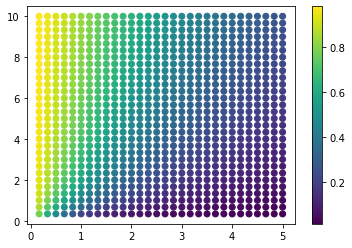

In [18]:
plt.scatter(data['alpha'], data['beta'], c=np.mean(data['recomb'], axis=1))

plt.colorbar()
plt.show()

In [19]:
xe1t_params = {"er_fraction_ambe_sr1": 0.030295843987699224, "rf0_sr1": 0.03358301091245768, "ac_rate_rn220_sr0": 1.6170966323266516, "g1": 0.142273708702041, "zeta": 0.044974109637703236, "ac_rate_ambe_sr1": 1.6748087942520922, "py2": -0.24646905912359227, "nr_rate_ambe_sr1": 2025.9599659367652, "eta": 3.35428057146546, "kappa": 0.13776090218160925, "s_s1_acc": 0.07731780866868798, "p_dpe": 0.2191448166462383, "er_fraction_ambe_sr0": 0.2454063712570706, "s_rec_eff": -0.31816407029454036, "rf1_sr0": 1.8180247075970317, "nr_rate_ambe_sr0": 1992.04939329848, "s_s2_acc": -0.1228122910975008, "ac_rate_ambe_sr0": 1.6927220473962246, "py3": 1.0950774408106905, "ac_rate_ng_sr1": 8.416229702014286, "s_scut_acc_on_mscatter": 0.5221952478657972, "py0": 0.12479984184924389, "beta": 269.4569455797065, "delta": 0.06108723720617416, "g2": 11.388194791209763, "py1": 30.325423964060334, "W": 0.013809387994615736, "gamma": 0.014140864759394875, "s_rec_s2bias_mean": 0.49198507921078005, "s_rec_bias_mean": 0.5948841302444277, "rf0_sr0": 0.040581595787840694, "nr_rate_ng_sr1": 2051.596216517608, "er_fraction_ng_sr1": 0.011860170398825927, "py4": 0.48166709274590885, "s_pos_rec": 0.5686231763318798, "elifetime_uncertainty_sr1": 0.005973513511586094, "er_rate_rn220_sr1": 7514.547481886541, "py_th": 4.017265580395882, "s_rec_bias_res": 0.31763472112328395, "lambda": 1.1444457673408979, "s_rec_s2bias_res": 0.5272888301015638, "Nex/Ni": 0.1455388304025605, "er_rate_rn220_sr0": 993.7741378351051, "alpha": 1.283267781071301}

In [20]:
#     // this model further extends the TI to match the low energy discrepancy by Qing
#     // This parameterization has been proven to fit at least the literature measurements
#     // better than the TI + exp (high energy)
#     float MeanQuantaNum = Energy / W;
#     float ExcimerNum = MeanQuantaNum * (ExIonRatio/(1.0 + ExIonRatio));
#     float IonNum = MeanQuantaNum - ExcimerNum;
#     *HeatQuenching=1.;
#     // explanations of the parameters
#     // 0 -> TI parameter
#     // 1 -> parameter for energy dependence of TI (exp)
#     // 2 -> parmaeter for field dependence of TI (power law)
#     // 3 -> FD parameter 1 for low energy tuning
#     // 4 -> FD parameter 2 for low energy tuning
#     // Normal TI recombination part
#     float TI = rec_frac_pars[0]*expf(-Energy/rec_frac_pars[1])*powf(Field, rec_frac_pars[2]);
#     *RecombFrac = 1.0 - logf(1.0 + (TI/4.0)*IonNum)/((TI/4.0)*IonNum);
#     // low energy tuning in form of Fermi-Dirac
#     float FD_fraction = 1. / (1. + exp( -(Energy-rec_frac_pars[3])/rec_frac_pars[4] ) );
#     *RecombFrac *= FD_fraction;
#     return;

Energy = decode_energy(fn)
W = xe1t_params['W']
ExIonRatio = xe1t_params['Nex/Ni']
rec_frac_pars = [xe1t_params['py0'], xe1t_params['py1'], xe1t_params['py2'], xe1t_params['py3'], xe1t_params['py4']]
rec_fluc_pars = [xe1t_params['rf0_sr0'], xe1t_params['rf1_sr0']]
Field = 120.0

MeanQuantaNum = Energy / W
ExcimerNum = MeanQuantaNum * (ExIonRatio/(1.0 + ExIonRatio))
IonNum = MeanQuantaNum - ExcimerNum
HeatQuenching = 1.
TI = rec_frac_pars[0]*np.exp(-Energy/rec_frac_pars[1])*np.power(Field, rec_frac_pars[2])
RecombFrac = 1.0 - np.log(1.0 + (TI/4.0)*IonNum)/((TI/4.0)*IonNum)
FD_fraction = 1. / (1. + np.exp( -(Energy-rec_frac_pars[3])/rec_frac_pars[4] ) )
RecombFrac *= FD_fraction

DeltaR = rec_fluc_pars[0] * (1. - np.exp(-Energy/rec_fluc_pars[1]) )

In [21]:
print(DeltaR, RecombFrac)

0.040083551155279555 0.5830801988385602


In [22]:
from scipy.stats import special_ortho_group as SO

In [24]:
r = np.mean(data['recomb'], axis=1).reshape((n_alpha, n_beta))
r_std = np.std(data['recomb'], axis=1).reshape((n_alpha, n_beta))
a = data['alpha'].reshape((n_alpha, n_beta))
b = data['beta'].reshape((n_alpha, n_beta))

<ipython-input-28-9e2269a98b8a>:5: UserWarning: No contour levels were found within the data range.
  plt.contour(a, b, r_std, levels=[DeltaR])


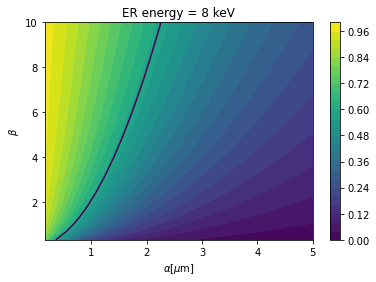

In [28]:
plt.contourf(a, b, r, levels=30)
plt.colorbar()

plt.contour(a, b, r, levels=[RecombFrac])
plt.contour(a, b, r_std, levels=[DeltaR])
# plt.contour(a, b, r_std * np.mean(so3) + np.std(so3) * (1-r), levels=[DeltaR])

plt.xlabel(r'$\alpha [\mu\mathrm{m}]$')
plt.ylabel(r'$\beta$')
plt.title('ER energy = %.0f keV' % Energy)
plt.show()

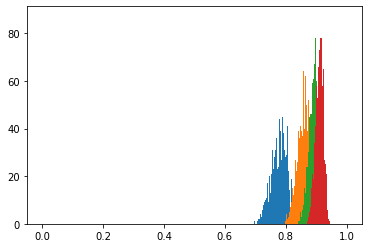

In [33]:
plt.hist(data['recomb'][0], bins=np.linspace(0, 1, 400))
plt.hist(data['recomb'][1], bins=np.linspace(0, 1, 400))
plt.hist(data['recomb'][2], bins=np.linspace(0, 1, 400))
plt.hist(data['recomb'][3], bins=np.linspace(0, 1, 400))
plt.show()